In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import pickle

In [42]:
df = pd.read_csv("Car_Price_Prediction (1).csv")
print("Data Shape:", df.shape)
print("\nInfo:")
print(df.info())


Data Shape: (1000, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB
None


In [43]:
print("\nSummary Stats:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

# Remove duplicates
before = df.shape[0]
df = df.drop_duplicates()
print(f"Removed {before - df.shape[0]} duplicate rows.")


Summary Stats:
              Year  Engine Size       Mileage         Price
count  1000.000000  1000.000000    1000.00000   1000.000000
mean   2010.688000     2.798300   97192.48700  25136.615530
std       6.288577     1.024137   59447.31576   5181.401368
min    2000.000000     1.000000      56.00000   6704.953524
25%    2005.000000     1.900000   44768.75000  21587.878370
50%    2011.000000     2.800000   94411.50000  25189.325247
75%    2016.000000     3.700000  148977.75000  28806.368974
max    2021.000000     4.500000  199867.00000  41780.504635

Missing values:
Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64
Removed 0 duplicate rows.


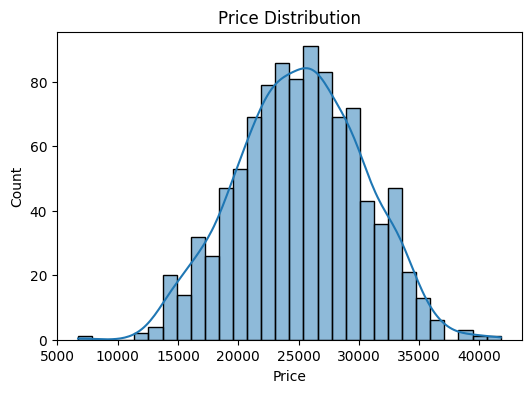

In [44]:
# 1. Price Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Price"], kde=True, bins=30)
plt.title("Price Distribution")
plt.show()

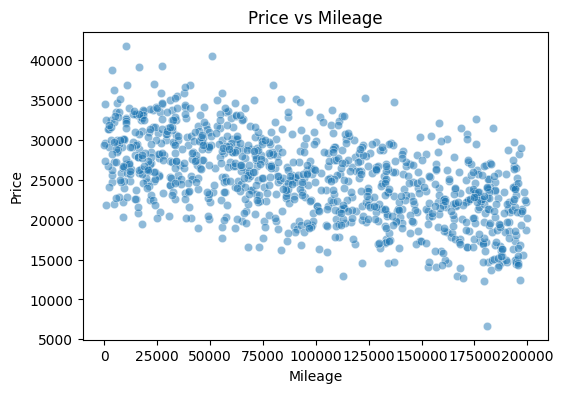

In [45]:
# 2. Price vs Mileage
plt.figure(figsize=(6,4))
sns.scatterplot(x="Mileage", y="Price", data=df, alpha=0.5)
plt.title("Price vs Mileage")
plt.show()

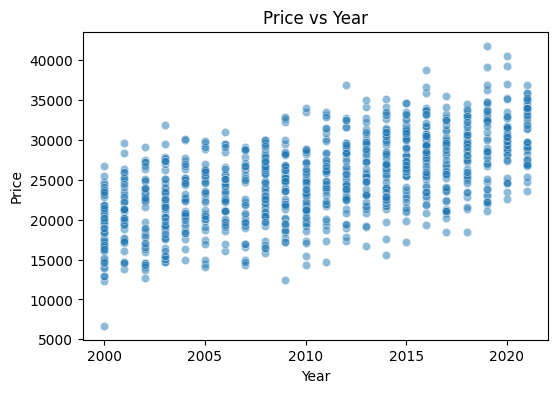

In [46]:
# 3. Price vs Year
plt.figure(figsize=(6,4))
sns.scatterplot(x="Year", y="Price", data=df, alpha=0.5)
plt.title("Price vs Year")
plt.show()

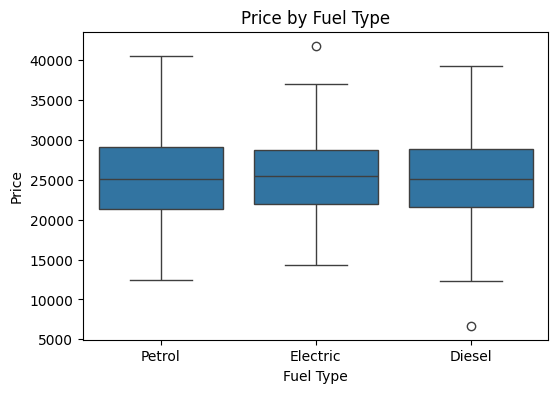

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Fuel Type", y="Price", data=df)
plt.title("Price by Fuel Type")
plt.show()

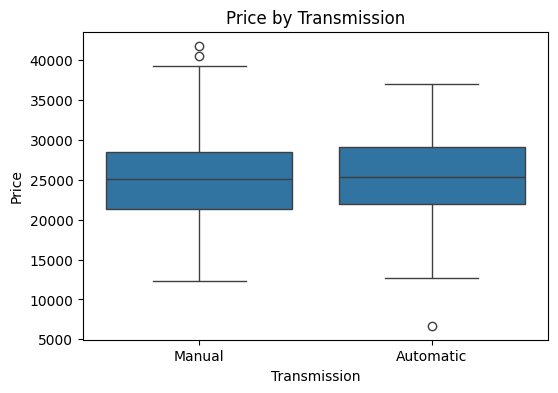

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Transmission", y="Price", data=df)
plt.title("Price by Transmission")
plt.show()


In [49]:
# -----------------------------
# Rename columns
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

# Car Age
df["Car_Age"] = 2025 - df["Year"]

# Mileage per Year
df["Mileage_per_Year"] = df.apply(
    lambda row: row["Mileage"] / row["Car_Age"] if row["Car_Age"] > 0 else row["Mileage"], axis=1
)

# Drop Year
df = df.drop("Year", axis=1)

print("\n✅ Sample after feature engineering:")
print(df.head())

# Save cleaned dataset
df.to_csv("Car_Price_Cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as Car_Price_Cleaned.csv")

# Features and Target
features = ["Car_Age", "Mileage", "Mileage_per_Year", "Fuel_Type", "Transmission", "Engine_Size", "Make", "Model"]
target = "Price"

X = df[features]
y = df[target]

print("\n✅ Features selected for training:", features)
print("✅ Target variable:", target)



✅ Sample after feature engineering:
    Make    Model  Engine_Size  Mileage Fuel_Type Transmission         Price  \
0  Honda  Model B          3.9    74176    Petrol       Manual  30246.207931   
1   Ford  Model C          1.7    94799  Electric    Automatic  22785.747684   
2    BMW  Model B          4.1    98385  Electric       Manual  25760.290347   
3  Honda  Model B          2.6    88919  Electric    Automatic  25638.003491   
4  Honda  Model C          3.4   138482    Petrol    Automatic  21021.386657   

   Car_Age  Mileage_per_Year  
0       10       7417.600000  
1       11       8618.090909  
2       19       5178.157895  
3       10       8891.900000  
4       21       6594.380952  

✅ Cleaned dataset saved as Car_Price_Cleaned.csv

✅ Features selected for training: ['Car_Age', 'Mileage', 'Mileage_per_Year', 'Fuel_Type', 'Transmission', 'Engine_Size', 'Make', 'Model']
✅ Target variable: Price


In [50]:
from sklearn.preprocessing import LabelEncoder
import pickle

categorical_cols = ["Fuel_Type", "Transmission", "Make", "Model"]
encoders = {}  # dictionary to store encoders

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col])           # fit on the full column from the dataset
    X[col] = le.transform(X[col])  # transform training data
    encoders[col] = le        # save each encoder

# Save all encoders
with open("car_price_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

print("\n✅ Encoders saved as car_price_encoders.pkl")



✅ Encoders saved as car_price_encoders.pkl


C:\Users\sahus\AppData\Local\Temp\ipykernel_3320\3678876753.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.transform(X[col])  # transform training data
C:\Users\sahus\AppData\Local\Temp\ipykernel_3320\3678876753.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.transform(X[col])  # transform training data
C:\Users\sahus\AppData\Local\Temp\ipykernel_3320\3678876753.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [51]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(Xtrain, ytrain)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=42)
rf_model.fit(Xtrain, ytrain)


,n_estimators,150
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Evaluation
y_pred_lin = lin_model.predict(Xtest)
print("\n🔹 Linear Regression")
print("R²:", r2_score(ytest, y_pred_lin))


# Random Forest Evaluation
y_pred_rf = rf_model.predict(Xtest)
print("\n🔹 Random Forest")
print("R²:", r2_score(ytest, y_pred_rf))




🔹 Linear Regression
R²: 0.8233443940625427

🔹 Random Forest
R²: 0.7829971657391244


In [54]:
import pickle

with open("car_price_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("\n✅ Model saved as car_price_model.pkl")



✅ Model saved as car_price_model.pkl


In [55]:
df.head()

,Make,Model,Engine_Size,Mileage,Fuel_Type,Transmission,Price,Car_Age,Mileage_per_Year
0,Honda,Model B,3.9,74176,Petrol,Manual,30246.207931,10,7417.600000
1,Ford,Model C,1.7,94799,Electric,Automatic,22785.747684,11,8618.090909
2,BMW,Model B,4.1,98385,Electric,Manual,25760.290347,19,5178.157895
3,Honda,Model B,2.6,88919,Electric,Automatic,25638.003491,10,8891.900000
4,Honda,Model C,3.4,138482,Petrol,Automatic,21021.386657,21,6594.380952
